In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\PMLS\Downloads\Car dekho.csv')

df.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0
3,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33bhp,78Nm,5.0
4,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141bhp,250Nm,5.0


Summary Stats-------------------->>>>>>>>

In [2]:
df.describe()


,year,selling_price,km_driven,seats
count,8148.000000,8.148000e+03,8.148000e+03,7927.000000
mean,2013.824006,6.401217e+05,6.967571e+04,5.415668
std,4.059542,8.085638e+05,5.655716e+04,0.958604
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.750000e+04,5.000000
max,2023.000000,1.000000e+07,2.360457e+06,14.000000


Total Cars by Fuel Type-------->>>>>>

In [3]:
df['fuel'].value_counts()


fuel
Diesel      4407
Petrol      3645
CNG           57
LPG           38
Electric       1
Name: count, dtype: int64

Average Selling Price by Year-------------->>>>>>>>>>>>>

In [4]:
df.groupby('year')['selling_price'].mean()


year
1983    3.000000e+05
1991    5.500000e+04
1994    8.800000e+04
1995    1.075000e+05
1996    8.166667e+04
1997    9.018173e+04
1998    7.310000e+04
1999    7.583333e+04
2000    9.304155e+04
2001    4.849830e+04
2002    9.899996e+04
2003    9.563669e+04
2004    1.109654e+05
2005    1.411598e+05
2006    1.639044e+05
2007    1.777182e+05
2008    2.074884e+05
2009    2.264349e+05
2010    2.726218e+05
2011    3.237753e+05
2012    3.511643e+05
2013    4.600059e+05
2014    5.161932e+05
2015    5.966133e+05
2016    6.998801e+05
2017    8.892465e+05
2018    9.577695e+05
2019    1.776986e+06
2020    8.852702e+05
2021    1.208857e+06
2022    1.143000e+06
2023    1.895833e+06
Name: selling_price, dtype: float64

Top 5 Most Expensive Cars------------------------------->>>>>>>>>>>

In [5]:
df[['Name', 'selling_price']].sort_values(by='selling_price', ascending=False).head(5)


,Name,selling_price
2501,Volvo XC90 T8 Excellence BSIV,10000000
20,BMW X7 xDrive 30d DPE,7200000
96,Audi A6 35 TFSI Matrix,6523000
94,Audi A6 35 TFSI Matrix,6223000
695,BMW 6 Series GT 630d Luxury Line,6000000


 <<<<<<----------Exploratory Data Analysis (EDA)----->>>>

Number of Cars by Year------>>>>>>>>>>

<Axes: title={'center': 'Cars Available by Year'}, ylabel='year'>

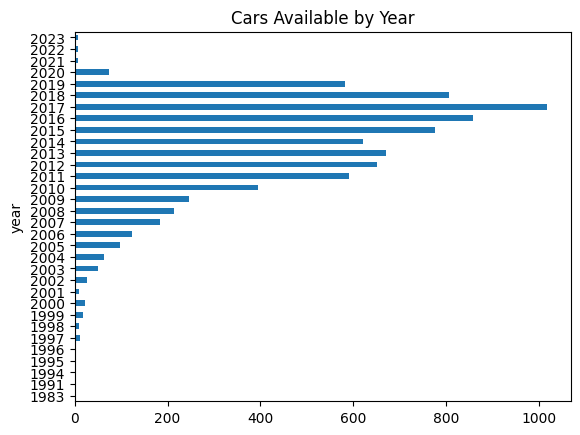

In [7]:
df['year'].value_counts().sort_index().plot(kind='barh', title='Cars Available by Year')


Fuel Type vs Transmission->>>>>>

<Axes: xlabel='fuel'>

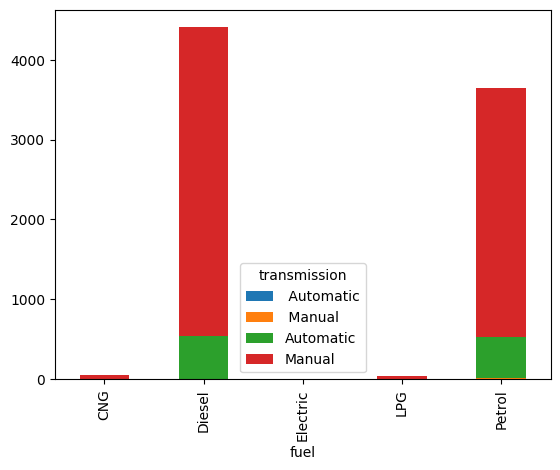

In [8]:
pd.crosstab(df['fuel'], df['transmission']).plot(kind='bar', stacked=True)


 Average Price by Fuel Type---------->>>>>>>

<Axes: ylabel='fuel'>

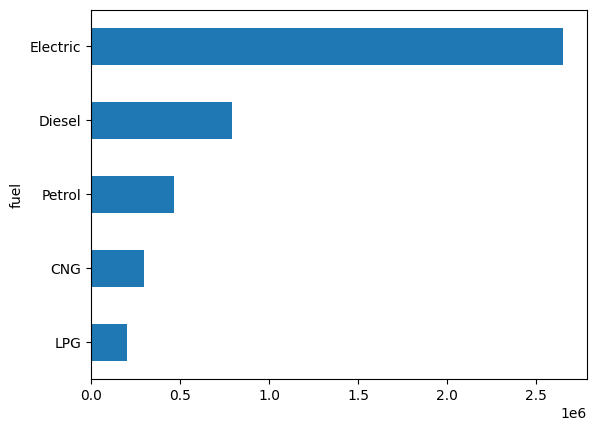

In [9]:
df.groupby('fuel')['selling_price'].mean().sort_values().plot(kind='barh')


 Most Common Car Models---->>>>>

<Axes: title={'center': 'Top 10 Most Listed Car Models'}, xlabel='Name'>

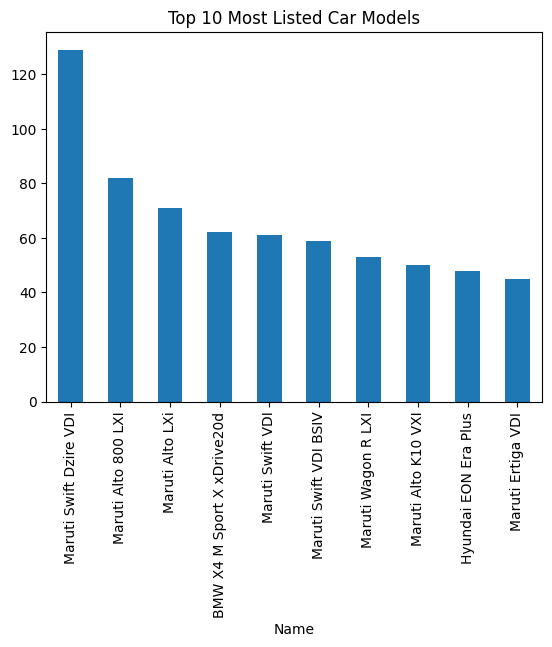

In [10]:
df['Name'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Listed Car Models')


Correlation Between km_driven, year, and selling_price------------>>>>>>>>>>>

In [11]:
df[['selling_price', 'km_driven', 'year']].corr()


,selling_price,km_driven,year
selling_price,1.000000,-0.226806,0.415084
km_driven,-0.226806,1.000000,-0.420446
year,0.415084,-0.420446,1.000000


Boxplot: Price vs Owner Type---------->>>>>>>>>>

In [ ]:
#!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\PMLS\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


<Axes: xlabel='owner', ylabel='selling_price'>

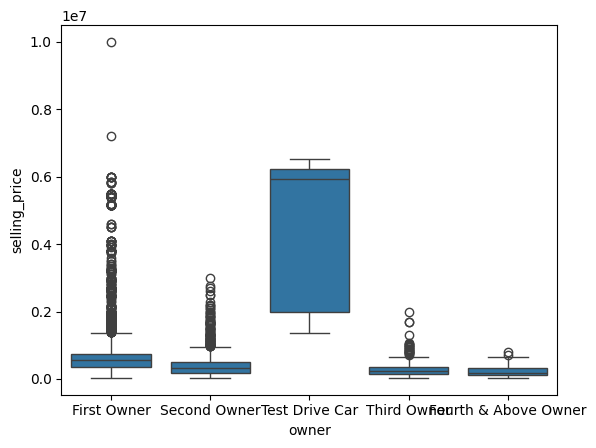

In [13]:
import seaborn as sns
sns.boxplot(data=df, x='owner', y='selling_price')

<<<<<<---------------Compare Actual Value vs Market Trends------------->>>>>>
Insight idea: Are some cars overpriced for their age, mileage, or fuel type?

In [14]:
# Price per km driven
df['price_per_km'] = df['selling_price'] / df['km_driven']
df[['Name', 'price_per_km']].sort_values(by='price_per_km', ascending=False).head(5)


,Name,price_per_km
6393,Maruti Eeco 5 STR With AC Plus HTR CNG,209000.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,5800.0
88,Toyota Innova Crysta 2.4 ZX AT,2300.0
20,BMW X7 xDrive 30d DPE,1440.0
1475,Volvo V40 D3 R-Design,1237.5


<<<<<<<-----------Outlier Detection----->>>>>
Find unusually expensive or cheap cars.


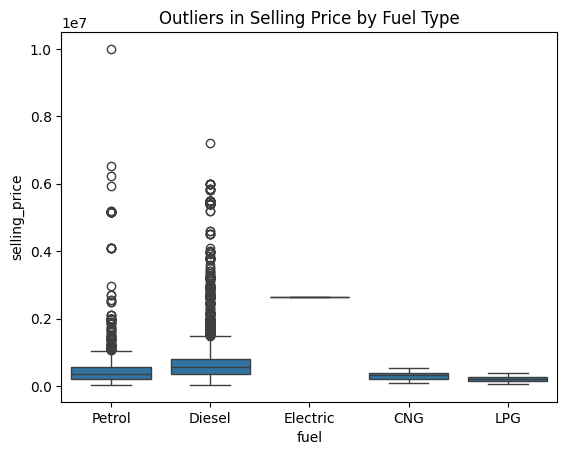

In [15]:
# Visual outliers by price
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='fuel', y='selling_price')
plt.title('Outliers in Selling Price by Fuel Type')
plt.show()


<<<------Hidden Trends Over Years-->>>>>>
Are newer cars always more expensive?

<Axes: title={'center': 'Average Selling Price Over Years'}, xlabel='year'>

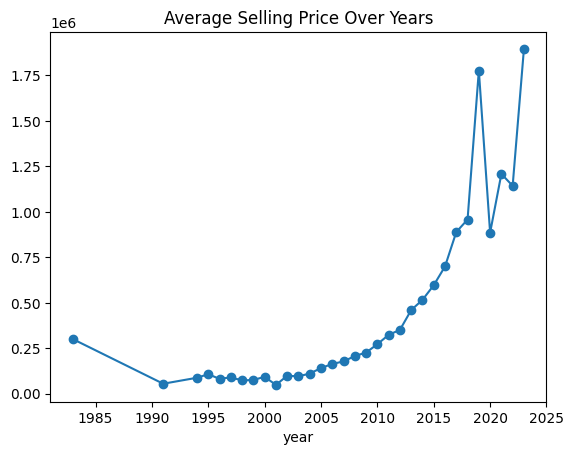

In [16]:
df.groupby('year')['selling_price'].mean().plot(marker='o', title='Average Selling Price Over Years')
